# **Actividad 9: Redes neuronales**
### Marco Antonio Mejia Garcia
###1950271
###008 N4 LMV

In [1]:
!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizar los datos
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

In [4]:
# Redimensionar los datos para la CNN (agregar un canal de profundidad)
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

In [5]:
# Crear el modelo de la red neuronal convolucional
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Capa de salida con softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Entrenar el modelo
model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.8898 - loss: 0.3784 - val_accuracy: 0.9840 - val_loss: 0.0540
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9893 - val_loss: 0.0393
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9892 - loss: 0.0348 - val_accuracy: 0.9892 - val_loss: 0.0366
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9903 - val_loss: 0.0378
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9946 - loss: 0.0175 - val_accuracy: 0.9905 - val_loss: 0.0423


In [8]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Exactitud del modelo en el conjunto de prueba: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9882 - loss: 0.0334
Exactitud del modelo en el conjunto de prueba: 0.9904


In [9]:
# Realizar predicciones
predictions = model.predict(test_data[:5])

for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    print(f"Predicción: {predicted_label}, Valor real: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicción: 7, Valor real: 7
Predicción: 2, Valor real: 2
Predicción: 1, Valor real: 1
Predicción: 0, Valor real: 0
Predicción: 4, Valor real: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


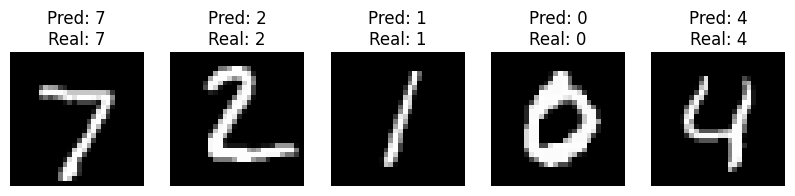

In [10]:
predictions = model.predict(test_data[:5])

# Mostrar las imágenes
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.title(f"Pred: {predicted_label}\nReal: {true_label}")
    plt.axis('off')
plt.show()

##- ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?##
####usamos 5 épocas, ya que es en el punto en donde obtenemos los mejores resultados sin saturar la red neuronal
##- ¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?##
####se obtiene un buen rendimiento, sin saturar la red y sin sacrificar precisión en las predicciones
